In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,roc_curve,roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv("C:\\Users\\Dedshan Vimukthi\\Documents\\Dataset3\\Bank.CSV")

In [4]:
data.head()

,age,duration,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,210,1.4,93.444,-36.1,4.963,5228.1,0
1,53,138,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,339,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,185,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,137,-2.9,92.201,-31.4,0.869,5076.2,1


In [5]:
x=data.iloc[:,:7].values
y=data.iloc[:,7].values

In [6]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [7]:
model=LogisticRegression()

In [8]:
model.fit(x_train,y_train)

LogisticRegression()

In [9]:
model.intercept_

array([0.00389661])

In [10]:
model.coef_

array([[ 0.00102981,  0.00453545, -0.21666832,  0.42441312,  0.05623463,
        -0.27695261, -0.0078621 ]])

In [11]:
y_pred=model.predict(x_test)

In [12]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [13]:
y_pred_probs=model.predict_proba(x_test)

In [14]:
y_pred_probs

array([[0.93744122, 0.06255878],
       [0.67198854, 0.32801146],
       [0.99149548, 0.00850452],
       ...,
       [0.99216231, 0.00783769],
       [0.94365314, 0.05634686],
       [0.99442536, 0.00557464]])

In [15]:
confusion_matrix(y_test,y_pred)

array([[7157,  168],
       [ 606,  307]], dtype=int64)

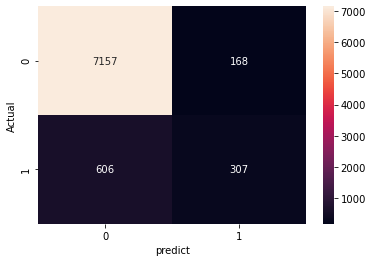

In [16]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt="g")
plt.xlabel("predict")
plt.ylabel("Actual")
plt.show()

In [17]:
tn,fp,fn,tp=confusion_matrix(y_test,y_pred).ravel() #1 positive grp,o negetive

In [18]:
tn

7157

In [19]:
tp

307

In [20]:
fp

168

In [21]:
fn

606

In [22]:
np.diag(confusion_matrix(y_test,y_pred)).sum()/len(y_test)

0.9060451565914057

In [23]:
accuracy_score(y_test,y_pred)

0.9060451565914057

In [24]:
MCE=1-accuracy_score(y_test,y_pred)
MCE

0.09395484340859428

In [25]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      7325
           1       0.65      0.34      0.44       913

    accuracy                           0.91      8238
   macro avg       0.78      0.66      0.70      8238
weighted avg       0.89      0.91      0.89      8238



In [26]:
False_Positive_Rate,True_Positive_Rate,_=roc_curve(y_test,y_pred_probs[:,1])

In [27]:
False_Positive_Rate

array([0.00000000e+00, 0.00000000e+00, 1.36518771e-04, ...,
       9.99317406e-01, 9.99590444e-01, 1.00000000e+00])

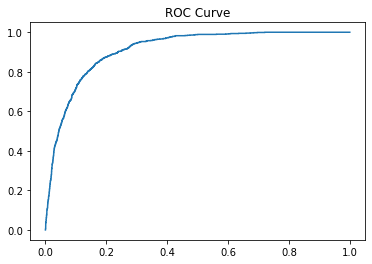

In [29]:
plt.plot(False_Positive_Rate,True_Positive_Rate)
plt.title("ROC Curve")
plt.show()

In [30]:
roc_auc_score(y_test,y_pred_probs[:,1])

0.9121249004706382